In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def getDf():
    files = {}
    for size in [1000000, 1500000, 10000000, 15000000]:
        with open("../result/resultRustVarious_{}.txt".format(size), "r") as f:
            files["size{}".format(size)] = [s.strip().split("#") for s in f.readlines()]

    dfs = {}
    for k in files.keys():
        df = pd.DataFrame(files[k])
        new_header = df.iloc[0]
        df = df[1:]
        df.columns = new_header
        dfs[k] = df
    data = dfs['size1000000']
    for s in [1500000, 10000000, 15000000]:
        data = pd.concat([data, dfs["size{}".format(s)]])
    data = data.astype({"datastructure": str, "size": int, "field": str, "createtime":int,  \
                        'accesstime': int,"totaltime": int, "count": int})
    return data

In [9]:
df = getDf()

In [12]:
df_avg = df.groupby(["size", "field"]).mean().reset_index()

In [14]:
df_avg.head()

,size,field,createtime,accesstime,totaltime,count
0,1000000,"""own""",1.766112e+09,474061606.0,1.430129e+10,434466883.0
1,1000000,"""reference""",1.761417e+09,481299067.8,1.436372e+10,434466883.0
2,1000000,"""slice""",1.770040e+09,455318712.8,1.431486e+10,434466883.0
3,1500000,"""own""",2.645460e+09,713929862.4,2.152281e+10,651681632.0
4,1500000,"""reference""",2.636466e+09,717250069.4,2.148264e+10,651681632.0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


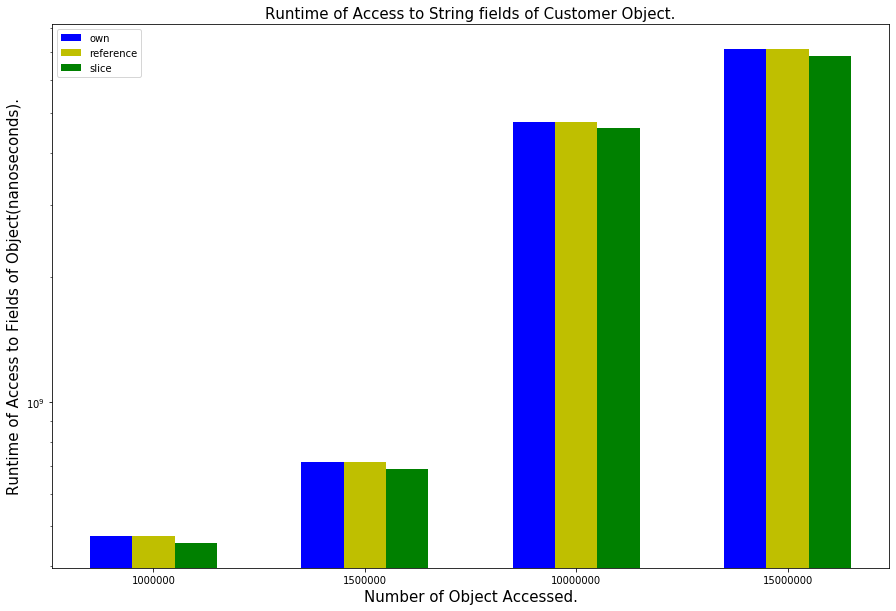

In [20]:
own = df_avg[df_avg["field"] == '"own"']
reference = df_avg[df_avg["field"] == '"own"']
slice_type = df_avg[df_avg["field"] == '"slice"']
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(df_avg['size'].nunique())
b1 = ax.bar(idx - w, own["accesstime"], width = w, color ='b', align = 'center')
b2 = ax.bar(idx , reference["accesstime"], width = w, color ='y', align = 'center')
b3 = ax.bar(idx + w, slice_type["accesstime"], width = w, color ='g', align = 'center')
label = np.sort(df_avg['size'].unique())
ax.set_xticks(idx)
ax.set_xticklabels(label)
ax.set_xlabel("Number of Object Accessed.", fontsize = 15)
ax.set_ylabel("Runtime of Access to Fields of Object(nanoseconds).", fontsize = 15)
ax.set_title("Runtime of Access to String fields of Customer Object.", fontsize = 15)
ax.legend((b1, b2, b3), ("own", "reference", "slice"))
ax.set_yscale('log')
fig.savefig("rust_borrowing.eps")
plt.show()